## Medical Cost Personal Insurance Datasets

#### Problem Statement:
Insurance Forecast by using Regression Algorithms

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

#### Columns                                            

1. age: age of primary beneficiary
2. sex: insurance contractor gender, female, male
3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
4. children: Number of children covered by health insurance / Number of dependents
5. smoker: Smoking
6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7. charges: Individual medical costs billed by health insurance

Predict : Charges  Can you accurately predict insurance costs?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing

### Exploratory Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Checking if the dataset has numerical Values

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

The Dataset has no NULL Values

In [5]:
df.shape

(1338, 7)

#### Summary Statistics

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Observation:
1. In the above data mean is almost equal to median so there is no skewness in the data
2. There may some Outlier present in the data

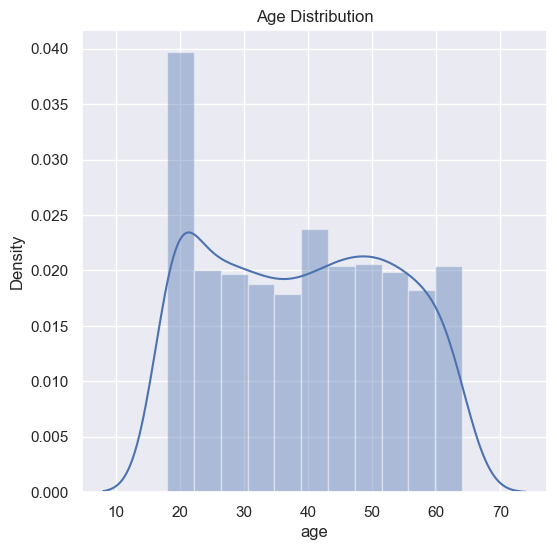

In [7]:
#Distribution of Age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df.age)
plt.title('Age Distribution')
plt.show()

Observation : There are more people in 20 year Age group

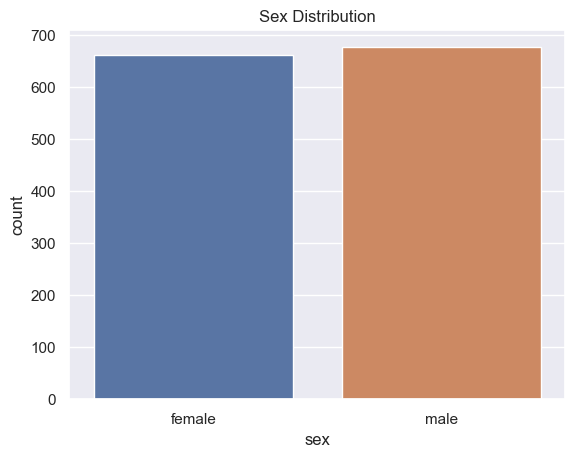

In [8]:
#Distribution of Sex column
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()

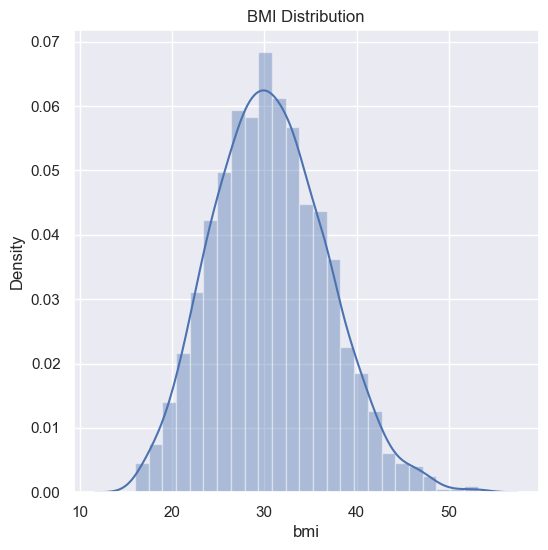

In [9]:
#Distribution of BMI
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df.bmi)
plt.title('BMI Distribution')
plt.show()

Observation - Many poeple are overweight in the given data which can have effect on Insurance charges

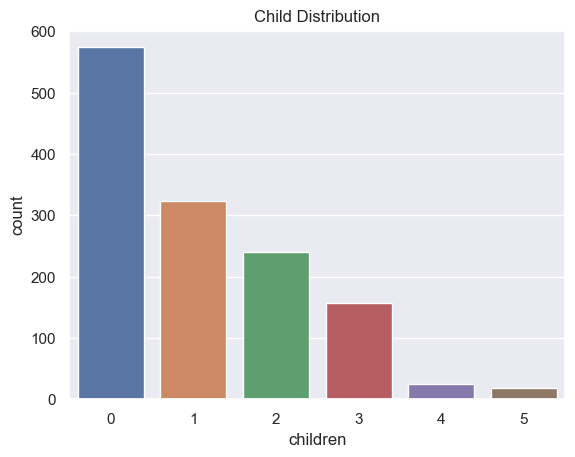

In [10]:
#Distribution of Children
sns.countplot(x=df.children,data=df)
plt.title('Child Distribution')
plt.show()

Observation - More people dont have children

In [11]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

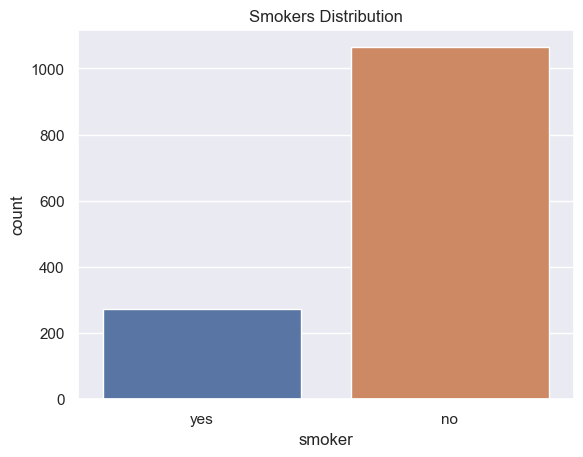

In [12]:
#Distribution for Smokers
sns.countplot(x=df.smoker,data=df)
plt.title('Smokers Distribution')
plt.show()

There are less smokers in the dataset

In [13]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

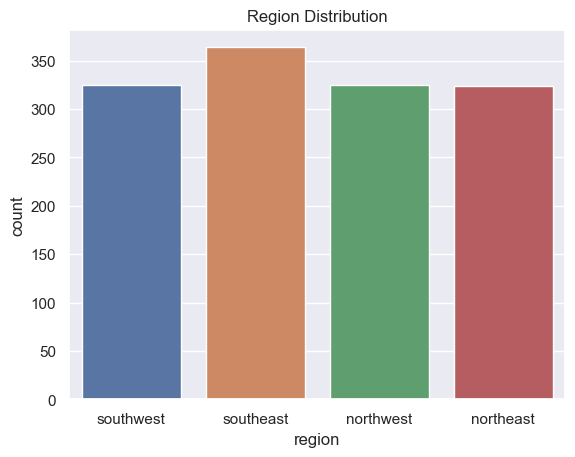

In [14]:
#Distribution for Smokers
sns.countplot(x=df.region,data=df)
plt.title('Region Distribution')
plt.show()

Data is almost evenly Distributed for all regions

In [16]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

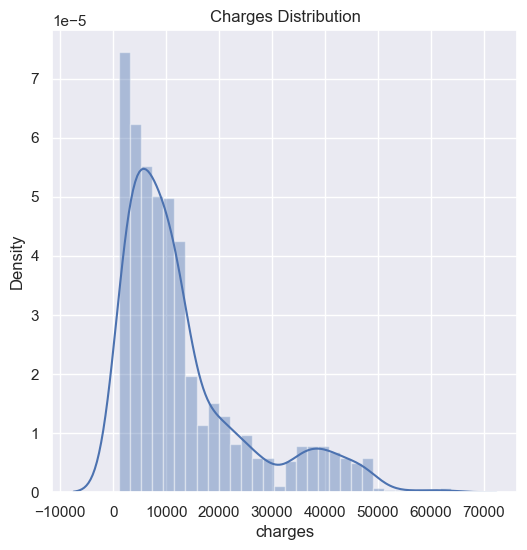

In [17]:
#Distribution of charges
plt.figure(figsize=(6,6))
sns.distplot(df.charges)
plt.title('Charges Distribution')
plt.show()

#### We are Finished with Exploratory Data Analysis

#### Proceeding to Feature Engineering

There are categorical features present in the dataset so we have to perform encoding to convert them to numerical features

In [20]:
#encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace = True)

#Encoding Smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace = True)

#Encoding Region
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [22]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [24]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.005212,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.016121,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.261829,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.019257,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.053930,-0.787251
region,0.005212,0.016121,-0.261829,0.019257,0.053930,1.000000,-0.056993
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.056993,1.000000


#### Splitting The Features and Target

In [25]:
X = df.drop('charges',axis = 1)
y = df.charges

In [26]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [27]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#### Splitting the data to train test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Model Training

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

#### Prediction on Test Data

In [38]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,
                   'rf':y_pred3,'GR':y_pred4})

In [39]:
df1

,Actual,Lr,svm,rf,GR
764,9095.06825,8597.284895,9547.684013,10760.535115,10810.952230
887,5272.17580,7231.743882,9527.883301,5438.710737,5837.446283
890,29330.98315,37039.232090,9634.739143,28219.005692,27621.536382
1293,9301.89355,9616.212129,9560.077437,11221.182687,9924.440767
259,33750.29180,27161.155047,9608.060877,34578.252657,33517.594584
...,...,...,...,...,...
109,47055.53210,39017.518638,9641.335114,47218.840078,45901.005642
575,12222.89830,11922.482922,9605.079273,12635.487622,12306.163109
535,6067.12675,7316.166925,9506.104913,6230.894058,6577.338535
543,63770.42801,40853.403071,9613.328977,46919.302467,48308.211959


#### Comparing the Performance Visually

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

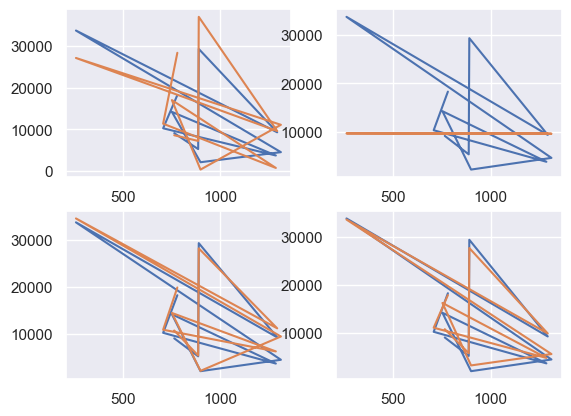

In [41]:
plt.subplot(221)
plt.plot(df1.Actual.iloc[0:11],label='Actual')
plt.plot(df1.Lr.iloc[0:11],label='Lr')

plt.subplot(222)
plt.plot(df1.Actual.iloc[0:11],label='Actual')
plt.plot(df1.svm.iloc[0:11],label='SVM')


plt.subplot(223)
plt.plot(df1.Actual.iloc[0:11],label='Actual')
plt.plot(df1.rf.iloc[0:11],label='RF')


plt.subplot(224)
plt.plot(df1.Actual.iloc[0:11],label='Actual')
plt.plot(df1.GR.iloc[0:11],label='GR')

plt.tight_layout

#### Model 3 and model 4 are performing well

#### We will check it using r2score

In [44]:
from sklearn import metrics

score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [45]:
print(score1,score2,score3,score4)

0.783021587162344 -0.06878077915521774 0.8607557241095234 0.8799564001737887


In [46]:
m1 = metrics.mean_absolute_error(y_test,y_pred1)
m2 = metrics.mean_absolute_error(y_test,y_pred2)
m3 = metrics.mean_absolute_error(y_test,y_pred3)
m4 = metrics.mean_absolute_error(y_test,y_pred4)

In [48]:
print(m1,m2,m3,m4)

4190.220190137917 8600.161830721212 2567.407407460107 2397.8652058815064


In [53]:
from sklearn.model_selection import KFold
model = GradientBoostingRegressor()
kfold_validation = KFold(10)

In [54]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print('mean: ',np.mean(results))

[0.88872661 0.86836254 0.84065932 0.74741874 0.86743919 0.92277399
 0.87720542 0.81978095 0.86168437 0.86624288]
mean:  0.8560294016672885


### The 4th model i.e GradientBoostRegressor performs better than other Models

##### Predicting for new Cusotmer

In [51]:
data = {
    'age':40,
    'sex':1,
    'bmi':40.30,
    'children':4,
    'smoker':1,
    'region':2
}
df1 = pd.DataFrame(data,index=[0])
df1

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [52]:
new_pred = gr.predict(df1)
print(new_pred)

[32515.30314733]


In [55]:
import pickle
filename = 'InsuranceCost.pkl'
pickle.dump(model,open(filename,'wb'))